In [1]:
import pickle 
import numpy as np 
import pandas as pd 
import pingouin as pg 
from scipy.special import softmax 

from IPython.display import clear_output
%matplotlib inline
%config InlineBackend.figure_format='retina'
from scipy.ndimage import gaussian_filter1d


import matplotlib.pyplot as plt 
import seaborn as sns 

import os
import sys
sys.path.append('..')
from utils.fit import fit_bms
from utils.viz import viz 
from utils.analyze import *
from utils.model import *
viz.get_style()
pth = os.path.abspath(os.getcwd())+'/..'

## The MOS6 model 

In [23]:
def predict_g(data_set, model):
    fname = f'../simulations/{data_set}/{model}/sim-map.csv'
    valid_sub_lst = pd.read_csv('../data/bifactor.csv').iloc[:, 0].tolist()
    data = pd.read_csv(fname).query(f'sub_id in {valid_sub_lst}')
    sel_data = data.groupby(by=['sub_id', 'group'])[['l1', 'l2', 'l3', 'g']].mean().reset_index()
    fig, axs = plt.subplots(1, 3, figsize=(10, 4))
    pallette = [viz.Pal2_1, viz.Pal2_2, viz.Pal2_3]
    for i, lmbda in enumerate(['l1', 'l2', 'l3']):
        ax = axs[i]
        print(f'For {lmbda}:')
        linear_regression(x=sel_data['g'].values, 
                        y=sel_data[lmbda].values, 
                        add_intercept=True)
        corr(sel_data['g'].values, sel_data[lmbda].values)
        sns.scatterplot(x=lmbda, y='g', data=sel_data, 
                        color=pallette[i],
                        s=35, alpha=.95, lw=1, ax=ax)
        sns.regplot(x=lmbda, y='g', data=sel_data, 
                        truncate=False,
                        color=[.2, .2, .2], scatter=False, ax=ax)
        ax.spines['left'].set_position(('axes',-0.1))
        ax.set_box_aspect(1)
        ax.set_ylabel('General factor (a.u.)') if i==0 else ax.set_ylabel('')
        ax.set_yticks([-1, 0, 1, 2])
        ax.set_xticks([-4, -2, 0, 2, 4])
    fig.tight_layout()

For l1:
	y=-0.324x+0.782,
	p=0.041
 	r(86)=-0.221, p=0.041
For l2:
	y=0.710x+-1.238,
	p=0.001
 	r(86)=0.360, p=0.001
For l3:
	y=-0.386x+0.456,
	p=0.008
 	r(86)=-0.285, p=0.008


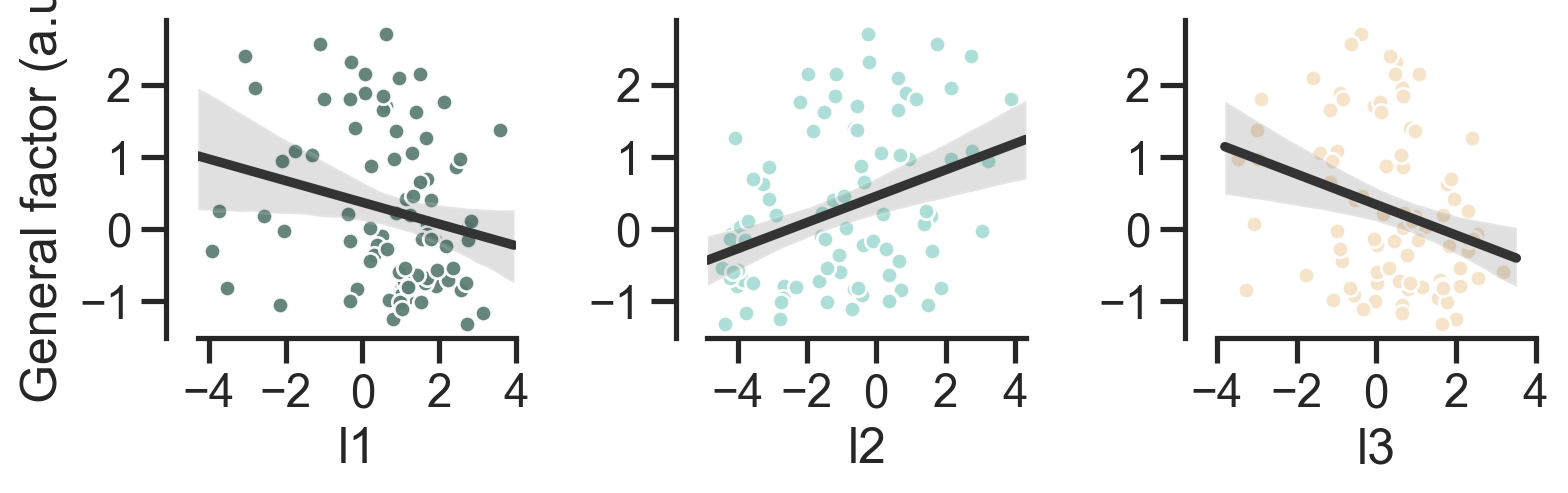

In [27]:
data_set, model = 'exp1data', 'MOS6'
predict_g(data_set, model)
plt.savefig(f'../figures/Fig5_mos6_predict_g.pdf', dpi=300)

## The MOS22 model

For l1:
	y=-0.417x+0.839,
	p=0.001
 	r(86)=-0.360, p=0.001
For l2:
	y=0.416x+-0.982,
	p=0.008
 	r(86)=0.284, p=0.008
For l3:
	y=0.001x+0.143,
	p=0.993
 	r(86)=0.001, p=0.993


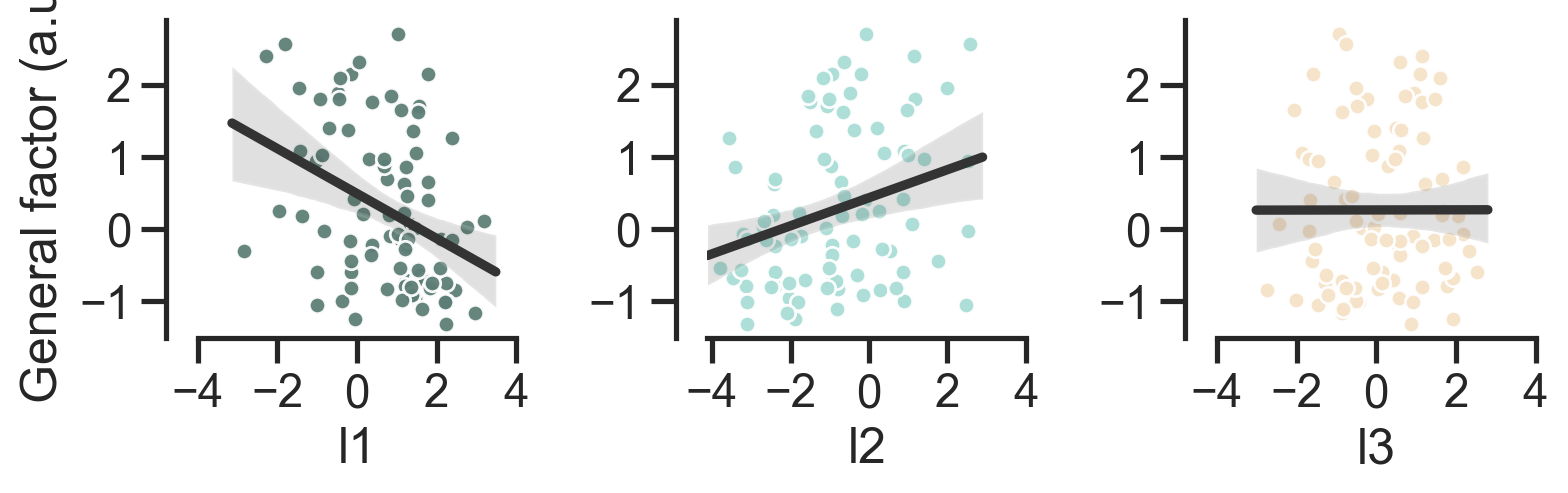

In [28]:
data_set, model = 'exp1data', 'MOS22'
predict_g(data_set, model)
plt.savefig(f'../figures/FigS5_mos22_predict_g.pdf', dpi=300)